<a href="https://colab.research.google.com/github/clauband21/First_time/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# Data Visualization and Preliminary Analysis

In [5]:
dataset = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv')

In [6]:
dataset.head(6)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2


In [8]:
dataset.shape


(200, 4)

In [10]:
dataset.describe().round(2)

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,15.13
std,85.85,14.85,21.78,5.28
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,11.00
50%,149.75,22.90,25.75,16.00
75%,218.82,36.52,45.10,19.05
max,296.40,49.60,114.00,27.00


In [25]:
correlation = dataset.corr()
correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [26]:
print(correlation["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


# Exploratory Analysis

## Box Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


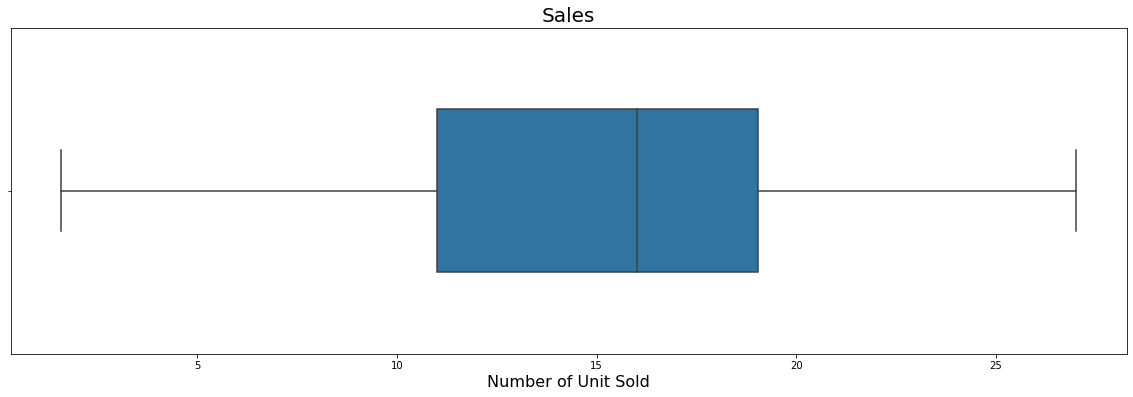

In [14]:
ax = sns.boxplot(dataset.Sales, width = 0.5)
ax.figure.set_size_inches(20, 6)
ax.set_title('Sales', fontsize=20)
ax.set_xlabel('Number of Unit Sold', fontsize=16)
ax

## Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


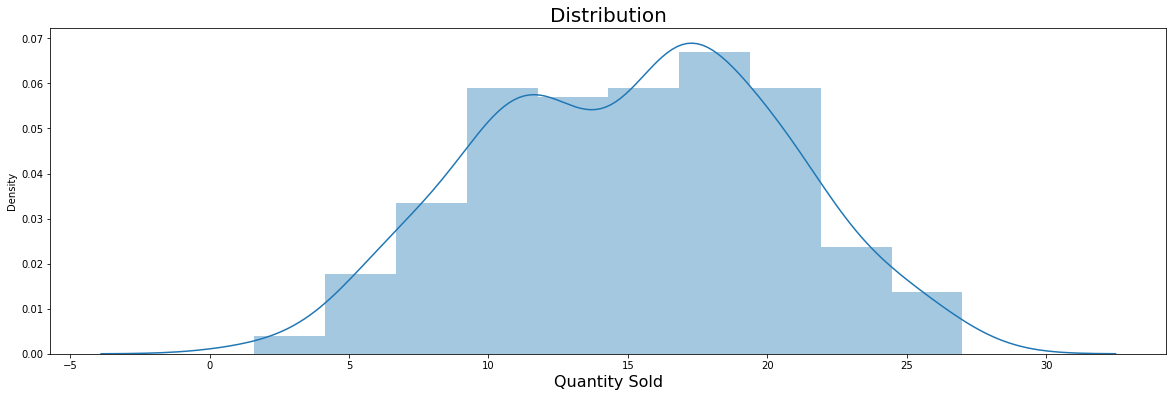

In [15]:
ax = sns.distplot(dataset.Sales)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribution', fontsize=20)
ax.set_xlabel('Quantity Sold', fontsize=16)
ax

## Dataset relationship

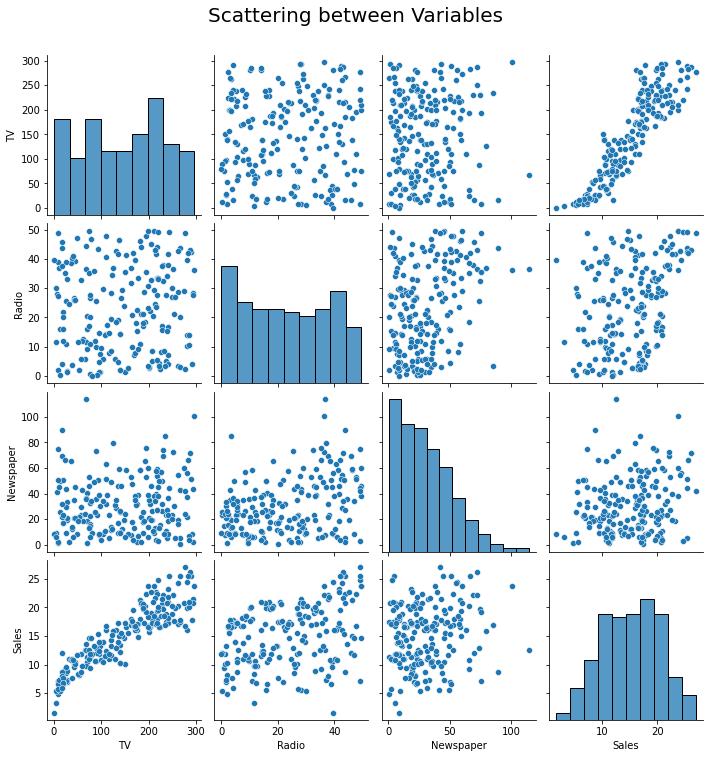

In [16]:
ax = sns.pairplot(dataset)
ax.fig.suptitle('Scattering between Variables', fontsize=20, y=1.05)
ax

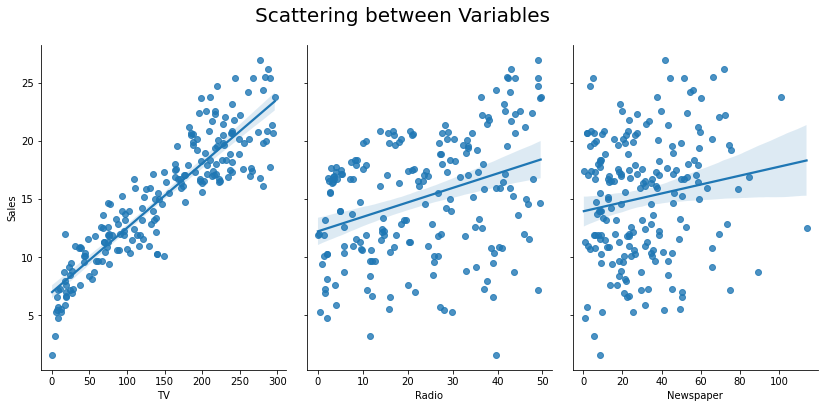

In [17]:
# Only with Sales

ax = sns.pairplot(data = dataset, y_vars = 'Sales', x_vars = ['TV', 'Radio', 'Newspaper'], kind = 'reg')
ax.figure.set_size_inches(12, 6)
ax.fig.suptitle('Scattering between Variables', fontsize=20, y=1.05)
ax

It'a clear that the amount spent on advertising the product on TV results in more sales of the product.

# Creating Training and Test Datasets

In [21]:
y = dataset.Sales
y.shape

(200,)

In [22]:
X = dataset[['TV', 'Radio', 'Newspaper']]
X.shape

(200, 3)

In [23]:
# Creating the train and test datasets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


# Future Sales Predictions

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [28]:
model = LinearRegression()

In [30]:
# Estimating the model with the train data

model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Linear Regression Score

print('R² = {}'.format(model.score(X_train, y_train).round(3)))

R² = 0.901


In [33]:
#Generating predictions with the Test Data (X_test)

sales_predictions = model.predict(X_test)

In [34]:
# Model's score

print('R² = {}'.format(metrics.r2_score(y_test, sales_predictions).round(3)))

R² = 0.904


## Graphical Analysis of Model Results

In [36]:
# Predictions with Train Data

sales_predictions_train = model.predict(X_train)

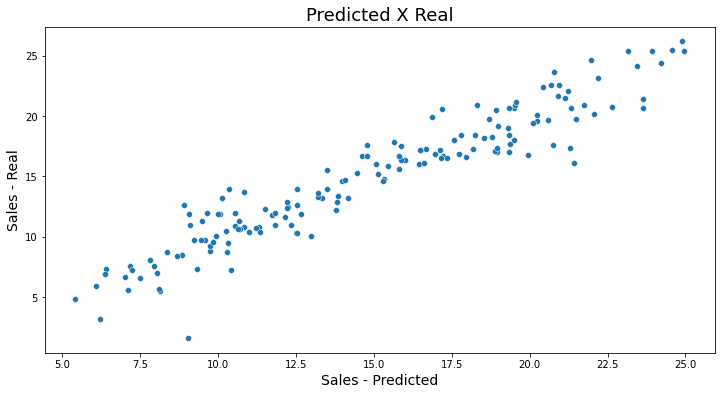

In [37]:
# Scatter graph between estimating values vs actual values

ax = sns.scatterplot(x = sales_predictions_train, y = y_train)

ax.figure.set_size_inches(12, 6)
ax.set_title('Predicted X Real', fontsize=18)
ax.set_xlabel('Sales - Predicted', fontsize=14)
ax.set_ylabel('Sales - Real', fontsize=14)
ax